In [17]:
from langgraph.graph import StateGraph,END,START
from typing import TypedDict
from langchain_huggingface import HuggingFaceEndpoint,ChatHuggingFace
from dotenv import load_dotenv
load_dotenv()

True

In [18]:
llm = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.2",
    task="text-generation",
    max_new_tokens=1000,
    temperature=0.1
)

In [19]:
model=ChatHuggingFace(llm=llm)


In [21]:
response=model.invoke("Write a detailed blog post on the impact of artificial intelligence on modern healthcare.")
print(response.content)

 Title: Transforming Healthcare: The Impact and Promise of Artificial Intelligence

Artificial Intelligence (AI) is no longer a futuristic concept. It has already made its way into various industries, including healthcare, revolutionizing the way we diagnose, treat, and manage patient care. In this blog post, we will explore the current impact of AI on modern healthcare and its promising future.

1. Diagnostics and Early Detection

One of the most significant applications of AI in healthcare is in diagnostics and early detection. AI algorithms can analyze vast amounts of medical data, including patient histories, lab results, and medical images, to identify patterns and make accurate diagnoses. For instance, IBM Watson for Oncology uses AI to analyze patient data and provide treatment recommendations for cancer patients.

2. Personalized Medicine

AI is also transforming the field of personalized medicine. By analyzing a patient's genetic makeup, lifestyle, and environmental factors, A

In [29]:
class BlogData(TypedDict):
    topic: str
    summary: str
    blog_post: str

Promting

In [35]:
def summary_node(state: BlogData) -> BlogData:
    prompt=f"Generate a concise summary for a blog post on the topic: {state['topic']}"
    summary=model.invoke(prompt)
    summary=summary.content

    state['summary']=summary
    return state

In [40]:
def blog_post_node(state: BlogData) -> BlogData:
    prompt=f"Write a detailed blog post based on the following summary: {state['summary']}"
    b=model.invoke(prompt)
    blog_post=b.content
    

    state['blog_post']=blog_post
    return state

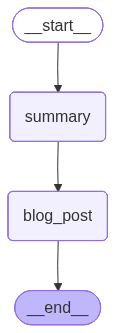

In [41]:
graph=StateGraph(BlogData)

graph.add_node('summary', summary_node)
graph.add_node('blog_post', blog_post_node)

# Define edges
graph.add_edge(START, 'summary')
graph.add_edge('summary', 'blog_post')
graph.add_edge('blog_post', END)
# Execute the graph
graph.compile()

In [42]:
workflow=graph.compile()
initial_state={'topic':'The impact of artificial intelligence on modern healthcare'}
final_state=workflow.invoke(initial_state)

print("Generated Blog Post:")
print(final_state['blog_post'])

Generated Blog Post:
 Title: Transforming Healthcare: The Game-Changing Impact of Artificial Intelligence

Artificial Intelligence (AI) is no longer a futuristic concept; it has become a reality in various industries, including healthcare. AI is revolutionizing modern healthcare, bringing about significant improvements in diagnosis, treatment, and patient care. In this blog post, we will explore how AI is enhancing the accuracy and efficiency of healthcare services, from analyzing medical images to predicting disease outbreaks.

One of the most promising applications of AI in healthcare is in medical diagnosis. Machine learning algorithms can now analyze vast amounts of patient data, including medical records, lab results, and medical images, to identify patterns and make predictions. This capability enables early and more precise diagnoses, leading to better treatment outcomes and improved patient outcomes. For instance, AI algorithms can analyze chest X-rays to detect lung cancer at 